#  FACE MASK DETECTION-TSF-GRIP-JULY21

##Ganesh Babu R



In [1]:
pip install tensorflow>=1.15.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras==2.3.1

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy==1.18.2

  Using cached numpy-1.18.2-cp38-cp38-win_amd64.whl (12.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.5.0 requires numpy~=1.19.2, but you'll have numpy 1.18.2 which is incompatible.


In [4]:
pip install matplotlib==3.2.1

In [5]:
pip install scipy==1.4.1

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install opencv-python==4.2.0.*

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install imutils==0.5.3

Note: you may need to restart the kernel to use updated packages.


[INFO] loading images...


D:\ANACONDA\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[INFO] compiling model...
[INFO] training head...


D:\ANACONDA\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
95/95 [==============================] - 162s 2s/step - loss: 0.4325 - accuracy: 0.8316 - val_loss: 0.1562 - val_accuracy: 0.9844
Epoch 2/20
95/95 [==============================] - 194s 2s/step - loss: 0.1543 - accuracy: 0.9634 - val_loss: 0.0800 - val_accuracy: 0.9909
Epoch 3/20
95/95 [==============================] - 201s 2s/step - loss: 0.1087 - accuracy: 0.9736 - val_loss: 0.0586 - val_accuracy: 0.9922
Epoch 4/20
95/95 [==============================] - 179s 2s/step - loss: 0.0801 - accuracy: 0.9799 - val_loss: 0.0461 - val_accuracy: 0.9935
Epoch 5/20
95/95 [==============================] - 182s 2s/step - loss: 0.0712 - accuracy: 0.9796 - val_loss: 0.0400 - val_accuracy: 0.9935
Epoch 6/20
95/95 [==============================] - 163s 2s/step - loss: 0.0608 - accuracy: 0.9825 - val_loss: 0.0376 - val_accuracy: 0.9935
Epoch 7/20
95/95 [==============================] - 161s 2s/step - loss: 0.0521 - accuracy: 0.9848 - val_loss: 0.0341 - val_accuracy: 0.9935
Epoch 8/20
95

D:\ANACONDA\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


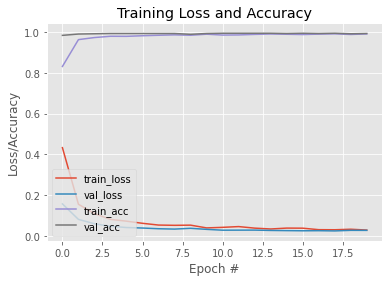

In [8]:
# import the necessary packages

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4 #initial learning rate(it should be less to get better accuracy)
EPOCHS = 20 #
BS = 32  #batch size
#we need to convert the image into array
#train the model from the array

DIRECTORY = r"dataset"       #Importing the dataset 
CATEGORIES = ["with_mask", "without_mask"]    #there are two folder inside the dataset categorised as with_mask and without_mask .
#these are just name of the folder and must be name   the sub folder inside the dataset .
#we need to this to create a location to the folder with mask and without mask .
#later we are gonna join path to them i.e create location to that folder .

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

data = []    #to store the array value of image
labels = [] #it stores the category of the image correspondly stored in the data

for category in CATEGORIES:  #looping into the category
    path = os.path.join(DIRECTORY, category) #joining or linking  the path of the CATEGORies and sub folder inside the dataset
    #by excetuing this inst we get creatina an loc of subfolder in dataset folder
    
    for img in os.listdir(path):  #listdir is used to create a list of all folder prsent in paramter of loc passed inside it
        #here it will create a list of image  with mask and for second iteration without mask
        
    	img_path = os.path.join(path, img) #we are creating path of every image in the list created
    	image = load_img(img_path, target_size=(224, 224))#from tensorflow.keras.preprocessing.image import load_img.
        #it loads the image from the specified path .target size is the dimension of the image 
        
    	image = img_to_array(image)#from tensorflow.keras.preprocessing.image import img_to_array.
        #it coverts the image into an array .
    	image = preprocess_input(image) #from tensorflow.keras.applications.mobilenet_v2 import preprocess_input #
        #making the image suitable for the model

    	data.append(image) #appending the images
    	labels.append(category)#appending the category of image.it is in the character 

# perform one-hot encoding on the labels
lb = LabelBinarizer() #from sklearn.preprocessing import LabelBinarizer..it is transformer.
#it will convert the charcter type type into binary.it is data processing and feature transforming

labels = lb.fit_transform(labels)#it will do fit and transform at the same time 
#fit - > for calculation purpose of particular formula..here it is labelbinarizer i.e it is the transformer
#multi-class labels to binary labels.

labels = to_categorical(labels) #from tensorflow.keras.utils import to_categorical.....
#it converts class vector or here class labels into binary matrix

data = np.array(data, dtype="float32") #coverts list into an array
labels = np.array(labels) #to convert labels into array

(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)
#splitting the data for testing and training
# data is split in a stratified fashion
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")
#it creates various image from a single image by changing the property..usitable to detect face from all kind of angle

# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
#we are creating two kind of models here by using MOBILENETS
#1.base model by using mobilenets
#2. head model by passing output of base models
#from tensorflow.keras.applications import MobileNetV2
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
#it is a pretrained model by google for of general purpose computer vision neural networks
#designed for mobile devices in mind to support classification, detection and more
#include_top=false ..not to include fully connected cnn..later we will connect the fc layer
#the dimension of image set intially, 3 is channel i.e rgb
#fasters to process,less parameter,less memory,sutable foir mobile application
#less accuray
#imagenet is the pretrained weights 

# construct the head of the model that will be placed on top of the
# the base model
#construction of fully connected layer
headModel = baseModel.output   #creating the headmodel from by passing the output of basemodel.
headModel = AveragePooling2D(pool_size=(7, 7))(headModel) #scaling down the size of the image
headModel = Flatten(name="flatten")(headModel) #flattening the layer
headModel = Dense(128, activation="relu")(headModel) 
 #rectified linear activation function
# the activation function is responsible for transforming the summed we#ighted input from the node 
#into the activation of the node or output for that input.
#is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.
#For a given node, the inputs are multiplied by the weights in a node and summed together. 
#This value is referred to as the summed activation of the node. 
#The summed activation is then transformed via an activation function and defines the specific output or “activation” of the node
headModel = Dropout(0.5)(headModel) 
#The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, 
#which helps prevent overfitting. 
#Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.
headModel = Dense(2, activation="softmax")(headModel) 
#2 ouput with mask and withou mask with activation softmax whixh is the probability based activation function

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
#model calling 

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
#inorder to compile a keras model we requrie 2 aruguments
#1.optimiser ->adams algorithm ->  To make as perfect or effective as possible and decreasing the learning rate by decay.
#2.loss -> binary_crossentropy

from tensorflow import keras
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"]) #tracking accuracy metrices.

# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS) #fitting module

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS) #evaluating the model

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("mask_detector.model", save_format="h5")

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [ ]:
# To use a pre-trained Caffe model with OpenCV DNN, we need two things
#1.The structure of the neural network is stored as a .prototxt file i.e model architecture file
#2..caffemodel file that contains the pre-trained weights

#The prototxt is a text file that holds information about the structure of the neural network:
#A list of layers in the neural network
#The parameters of each layer, such as its name, type, input dimensions, and output dimensions
#The connections between the layers

#Caffe (Convolutional Architecture for Fast Feature Embedding) is a deep learning framework that allows users to create 
                                                                                         #1.image classification and 
                                                                                         #2.image segmentation models. 
#Initially, users create and save their models as plain text PROTOTEXT files.
#After a user trains and refines their model using Caffe, the program saves the user's trained model as a CAFFEMODEL file.


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import imutils
import time
import cv2
import os

def detect_and_predict_mask(frame, faceNet, maskNet):
	# grab the dimensions of the frame and then construct a blob
	# from it
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224),
		(104.0, 177.0, 123.0))

	# pass the blob through the network and obtain the face detections
	faceNet.setInput(blob)
	detections = faceNet.forward()
	print(detections.shape)

	# initialize our list of faces, their corresponding locations,
	# and the list of predictions from our face mask network
	faces = []
	locs = []
	preds = []

	# loop over the detections
	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with
		# the detection
		confidence = detections[0, 0, i, 2]

		# filter out weak detections by ensuring the confidence is
		# greater than the minimum confidence
		if confidence > 0.5:
			# compute the (x, y)-coordinates of the bounding box for
			# the object
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")

			# ensure the bounding boxes fall within the dimensions of
			# the frame
			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

			# extract the face ROI, convert it from BGR to RGB channel
			# ordering, resize it to 224x224, and preprocess it
			face = frame[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, (224, 224))
			face = img_to_array(face)
			face = preprocess_input(face)

			# add the face and bounding boxes to their respective
			# lists
			faces.append(face)
			locs.append((startX, startY, endX, endY))

	# only make a predictions if at least one face was detected
	if len(faces) > 0:
		# for faster inference we'll make batch predictions on *all*
		# faces at the same time rather than one-by-one predictions
		# in the above `for` loop
		faces = np.array(faces, dtype="float32")
		preds = maskNet.predict(faces, batch_size=32)

	# return a 2-tuple of the face locations and their corresponding
	# locations
	return (locs, preds)

# load our serialized face detector model from disk
prototxtPath = r"face_detector\deploy.prototxt"
weightsPath = r"face_detector\res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)
# To use a pre-trained Caffe model with OpenCV DNN, we need two things
#1.The structure of the neural network is stored as a .prototxt file i.e model architecture file
#2..caffemodel file that contains the pre-trained weights

#The prototxt is a text file that holds information about the structure of the neural network:
#A list of layers in the neural network
#The parameters of each layer, such as its name, type, input dimensions, and output dimensions
#The connections between the layers

#Caffe (Convolutional Architecture for Fast Feature Embedding) is a deep learning framework that allows users to create 
                                                                                         #1.image classification and 
                                                                                         #2.image segmentation models. 
#Initially, users create and save their models as plain text PROTOTEXT files.
#After a user trains and refines their model using Caffe, the program saves the user's trained model as a CAFFEMODEL file.

# load the face mask detector model from disk
maskNet = load_model("mask_detector.model")

# initialize the video stream
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()


# loop over the frames from the video stream
while True:
	# grab the frame from the threaded video stream and resize it
	# to have a maximum width of 400 pixels
	frame = vs.read()
	frame = imutils.resize(frame, width=400)

	# detect faces in the frame and determine if they are wearing a
	# face mask or not
	(locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)

	# loop over the detected face locations and their corresponding
	# locations
	for (box, pred) in zip(locs, preds):
		# unpack the bounding box and predictions
		(startX, startY, endX, endY) = box
		(mask, withoutMask) = pred

		# determine the class label and color we'll use to draw
		# the bounding box and text
		label = "Mask" if mask > withoutMask else "No Mask"
		color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

		# include the probability in the label
		label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

		# display the label and bounding box rectangle on the output
		# frame
		cv2.putText(frame, label, (startX, startY - 10),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
		cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)

	# show the output frame
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF

	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break

# do a bit of cleanupq
cv2.destroyAllWindows()
vs.stop()